In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cervical-cancer-risk-factorse/risk_factors_cervical_cancer.csv


<h2>DataSet Link</h2>

https://www.kaggle.com/yamqwe/cervical-cancer-risk-factorse

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("../input/cervical-cancer-risk-factorse/risk_factors_cervical_cancer.csv")

In [4]:
data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [5]:
data.tail()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,?,?,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,0,0
857,29,2.0,20.0,1.0,0.0,0.0,0.0,1.0,0.5,0.0,...,?,?,0,0,0,0,0,0,0,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [7]:
data.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [8]:
data.nunique()

Age                                   44
Number of sexual partners             13
First sexual intercourse              22
Num of pregnancies                    12
Smokes                                 3
Smokes (years)                        31
Smokes (packs/year)                   63
Hormonal Contraceptives                3
Hormonal Contraceptives (years)       41
IUD                                    3
IUD (years)                           27
STDs                                   3
STDs (number)                          6
STDs:condylomatosis                    3
STDs:cervical condylomatosis           2
STDs:vaginal condylomatosis            3
STDs:vulvo-perineal condylomatosis     3
STDs:syphilis                          3
STDs:pelvic inflammatory disease       3
STDs:genital herpes                    3
STDs:molluscum contagiosum             3
STDs:AIDS                              2
STDs:HIV                               3
STDs:Hepatitis B                       3
STDs:HPV        

In [9]:
for x in data.columns:
    data[x].replace("?",np.nan,inplace=True)

In [10]:
data.isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [11]:
import missingno as msno

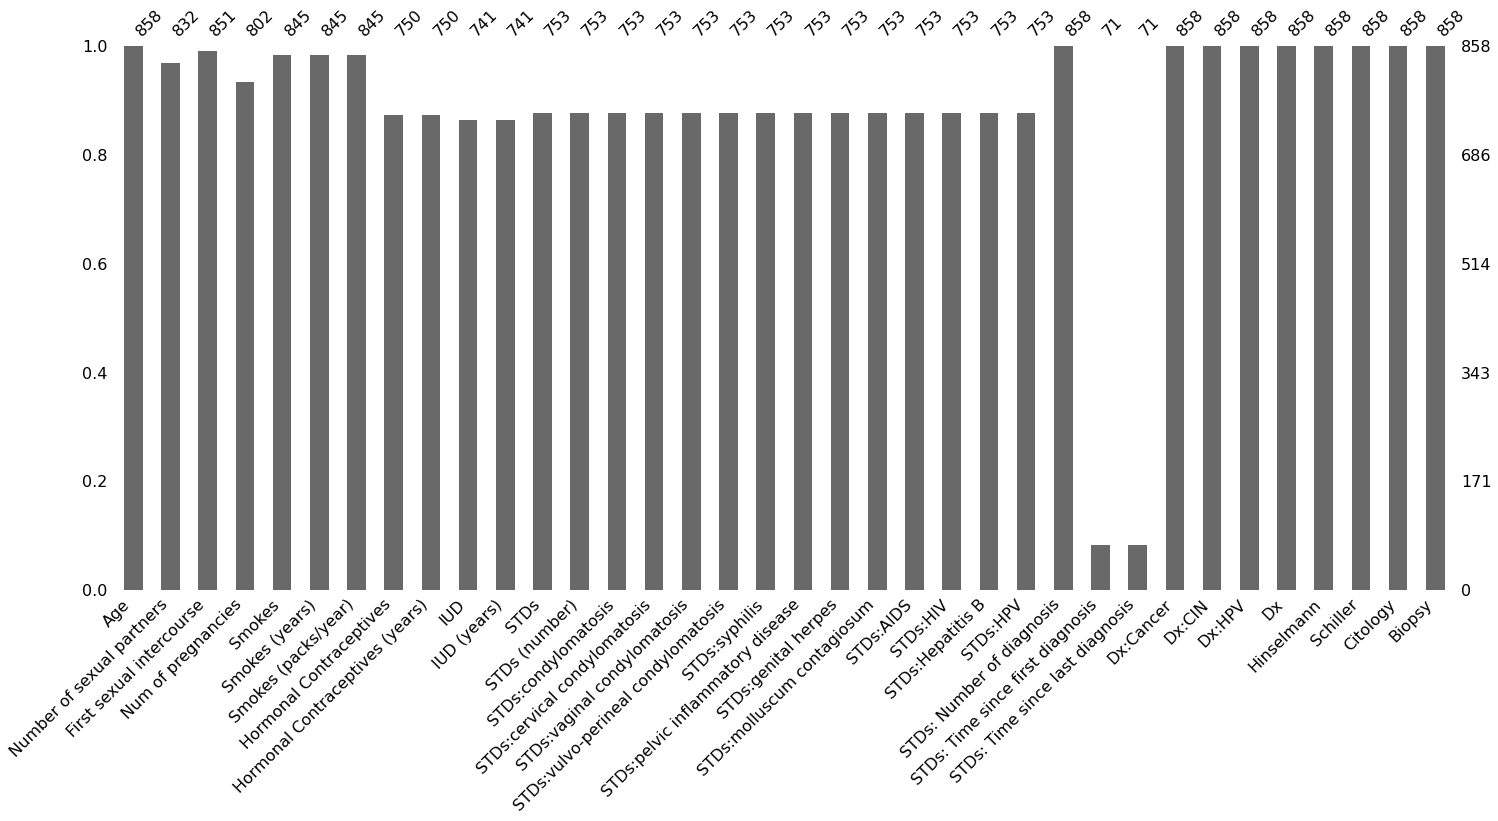

In [12]:
msno.bar(data)
plt.show()

In [13]:
data.isnull().mean()*100

Age                                    0.000000
Number of sexual partners              3.030303
First sexual intercourse               0.815851
Num of pregnancies                     6.526807
Smokes                                 1.515152
Smokes (years)                         1.515152
Smokes (packs/year)                    1.515152
Hormonal Contraceptives               12.587413
Hormonal Contraceptives (years)       12.587413
IUD                                   13.636364
IUD (years)                           13.636364
STDs                                  12.237762
STDs (number)                         12.237762
STDs:condylomatosis                   12.237762
STDs:cervical condylomatosis          12.237762
STDs:vaginal condylomatosis           12.237762
STDs:vulvo-perineal condylomatosis    12.237762
STDs:syphilis                         12.237762
STDs:pelvic inflammatory disease      12.237762
STDs:genital herpes                   12.237762
STDs:molluscum contagiosum            12

In [14]:
data = data.drop(['STDs: Time since first diagnosis','STDs: Time since last diagnosis'],axis=1)

In [15]:
data.dtypes

Age                                    int64
Number of sexual partners             object
First sexual intercourse              object
Num of pregnancies                    object
Smokes                                object
Smokes (years)                        object
Smokes (packs/year)                   object
Hormonal Contraceptives               object
Hormonal Contraceptives (years)       object
IUD                                   object
IUD (years)                           object
STDs                                  object
STDs (number)                         object
STDs:condylomatosis                   object
STDs:cervical condylomatosis          object
STDs:vaginal condylomatosis           object
STDs:vulvo-perineal condylomatosis    object
STDs:syphilis                         object
STDs:pelvic inflammatory disease      object
STDs:genital herpes                   object
STDs:molluscum contagiosum            object
STDs:AIDS                             object
STDs:HIV  

In [16]:
for x in data.columns:
    data[x] =  data[x].astype(str).astype(float)

In [17]:
data.dtypes

Age                                   float64
Number of sexual partners             float64
First sexual intercourse              float64
Num of pregnancies                    float64
Smokes                                float64
Smokes (years)                        float64
Smokes (packs/year)                   float64
Hormonal Contraceptives               float64
Hormonal Contraceptives (years)       float64
IUD                                   float64
IUD (years)                           float64
STDs                                  float64
STDs (number)                         float64
STDs:condylomatosis                   float64
STDs:cervical condylomatosis          float64
STDs:vaginal condylomatosis           float64
STDs:vulvo-perineal condylomatosis    float64
STDs:syphilis                         float64
STDs:pelvic inflammatory disease      float64
STDs:genital herpes                   float64
STDs:molluscum contagiosum            float64
STDs:AIDS                         

In [18]:
def imputation_null_value(data):
    for x in  data.columns:
        value =data[x].mode(dropna=True).loc[0]
        data[x].fillna(value,inplace=True)
imputation_null_value(data)

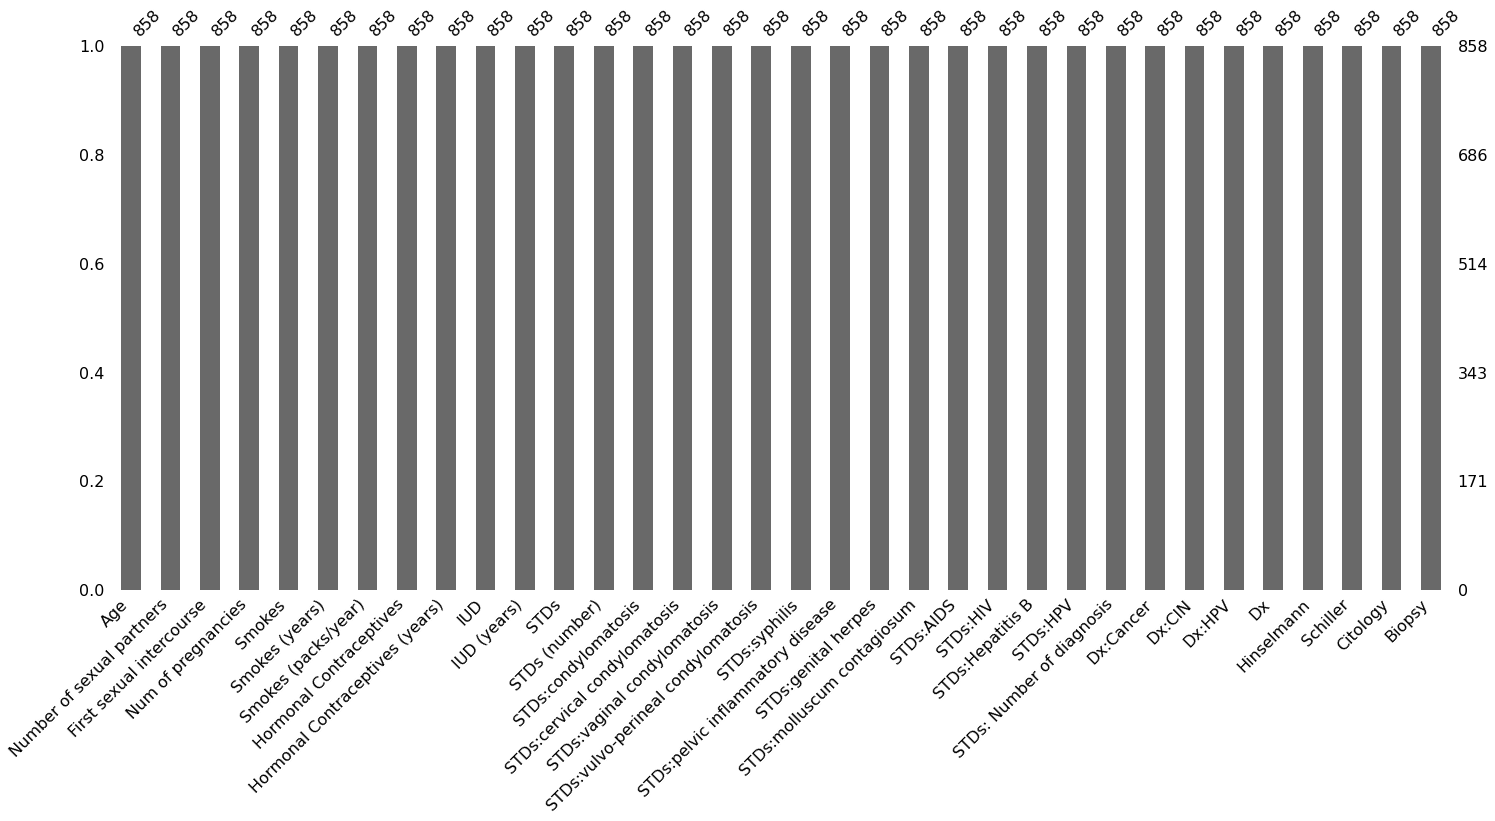

In [19]:
msno.bar(data)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


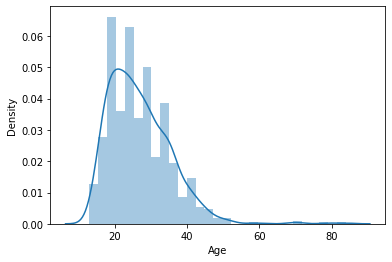

In [20]:
sns.distplot(data['Age'])
plt.show()

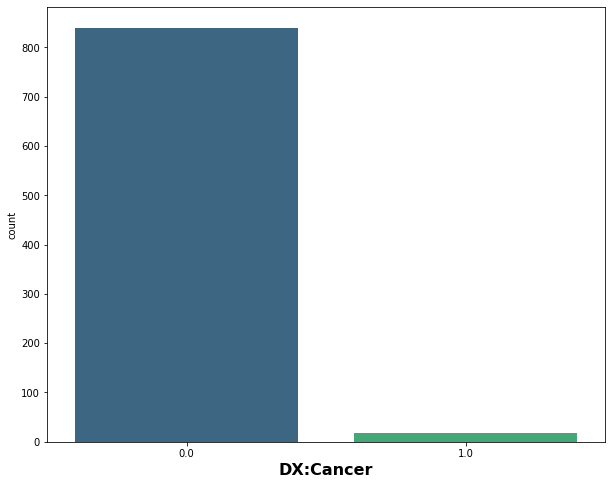

In [21]:
plt.figure(figsize=(10,8))
sns.countplot(x = 'Dx:Cancer',data =data,palette = 'viridis')
plt.xlabel("DX:Cancer",fontweight = 'bold',size=16)
plt.show()

# Feature selection

In [22]:
from sklearn.model_selection import train_test_split

# to determine the chi2 value
from sklearn.feature_selection import chi2
# to select the features
from sklearn.feature_selection import SelectKBest

In [23]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('Dx:Cancer',axis=1),
    data['Dx:Cancer'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((600, 33), (258, 33))

In [24]:
X_train.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [25]:
y_train.isnull().sum()

0

In [26]:
# calculate the chi2 p_value between each of the variables
# and the target

# chi2 returns 2 arrays, one contains the F-Scores which are then
# evaluated against the chi2 distribution to obtain the pvalue.
# The pvalues are in the second array

f_score = chi2(X_train.fillna(0), y_train)

# the 2 arrays of values
f_score

(array([1.32935420e+01, 1.11750619e+00, 1.82970704e+00, 8.90430274e-01,
        2.96954428e-01, 3.73948665e+01, 1.65779491e+02, 2.25611843e-02,
        8.06216187e-01, 1.65458661e+01, 9.57520817e+01, 1.13921902e+00,
        1.86757216e+00, 5.97623090e-01,            nan, 5.60271647e-02,
        5.97623090e-01, 2.98811545e-01, 1.86757216e-02, 1.86757216e-02,
                   nan,            nan, 2.61460102e-01, 1.86757216e-02,
                   nan, 1.10186757e+00, 1.49405772e-01, 4.42885013e+02,
        2.32038586e+02, 2.30482620e+01, 2.33471640e+01, 1.16735820e+01,
        2.36715102e+01]),
 array([2.66321865e-04, 2.90456071e-01, 1.76162153e-01, 3.45360734e-01,
        5.85798050e-01, 9.64757313e-10, 6.18065160e-38, 8.80603821e-01,
        3.69241306e-01, 4.74873946e-05, 1.30209511e-22, 2.85817414e-01,
        1.71753403e-01, 4.39486365e-01,            nan, 8.12889085e-01,
        4.39486365e-01, 5.84628436e-01, 8.91300225e-01, 8.91300225e-01,
                   nan,            nan

In [27]:
# 1) let's capture the p_values (in the second array, remember python indexes at 0) in a pandas Series
# 2) add the variable names in the index
# 3) order the variables based on their fscore

pvalues = pd.Series(f_score[1])
pvalues.index = X_train.columns
pvalues.sort_values(ascending=True)

Dx:HPV                                2.550121e-98
Dx                                    2.141752e-52
Smokes (packs/year)                   6.180652e-38
IUD (years)                           1.302095e-22
Smokes (years)                        9.647573e-10
Biopsy                                1.142616e-06
Schiller                              1.352428e-06
Hinselmann                            1.579853e-06
IUD                                   4.748739e-05
Age                                   2.663219e-04
Citology                              6.339384e-04
STDs (number)                         1.717534e-01
First sexual intercourse              1.761622e-01
STDs                                  2.858174e-01
Number of sexual partners             2.904561e-01
STDs: Number of diagnosis             2.938566e-01
Num of pregnancies                    3.453607e-01
Hormonal Contraceptives (years)       3.692413e-01
STDs:condylomatosis                   4.394864e-01
STDs:vulvo-perineal condylomato

**The chi2, the smaller the p_value the more significant the feature is to predict the target.**

In [28]:
sel_ = SelectKBest(chi2, k=15).fit(X_train, y_train)

# display features
X_train.columns[sel_.get_support()]

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Smokes (years)', 'Smokes (packs/year)', 'IUD', 'IUD (years)', 'STDs',
       'STDs (number)', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology',
       'Biopsy'],
      dtype='object')

In [29]:
# to remove the rest of the features:

X_train = sel_.transform(X_train)
X_test = sel_.transform(X_test)

In [30]:
X_train.shape,X_test.shape

((600, 15), (258, 15))

# Feature Scaling

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [33]:
y_pred = classifier.predict(X_test)
print(y_pred)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]


In [34]:
from sklearn.metrics import accuracy_score
acc1 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc1}")

Accuracy score: 0.9844961240310077


# SVM

In [35]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [36]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[250   1]
 [  3   4]]


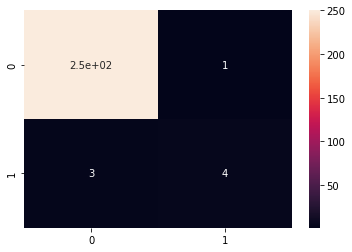

In [37]:
sns.heatmap(cm,annot=True)
plt.show()

In [38]:
acc2 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc2}")

Accuracy score: 0.9844961240310077


# Training the K-NN model on the Training set

In [39]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [40]:
y_pred = classifier.predict(X_test)

# KNN confusion matrix

In [41]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[251   0]
 [  3   4]]


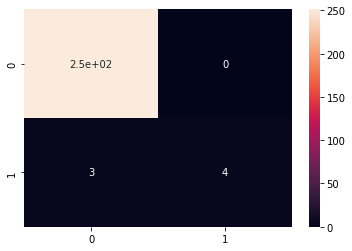

In [42]:
sns.heatmap(cm,annot=True)
plt.show()

In [43]:
acc3 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc3}")

Accuracy score: 0.9883720930232558


# Training the Naive Bayes on the Training set

In [44]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [45]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[204  47]
 [  2   5]]


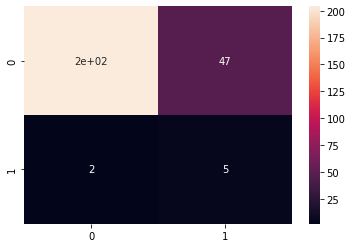

In [46]:
sns.heatmap(cm,annot=True)
plt.show()

In [47]:
acc4 = accuracy_score(y_test, y_pred)
print(f"Accuracy score : {acc4}")

Accuracy score : 0.810077519379845


# Training Decision Tree Classification on Train set

In [48]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [49]:
y_pred = classifier.predict(X_test)
acc5 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc5}")

Accuracy score: 0.9922480620155039


# Training the Random Forest Classification model on the Training set

In [50]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [51]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc6 = accuracy_score(y_test, y_pred)

[[251   0]
 [  7   0]]


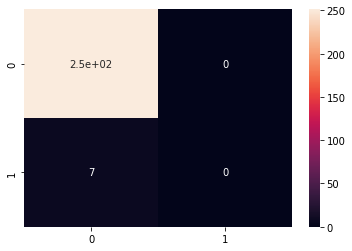

In [52]:
sns.heatmap(cm,annot=True)
plt.show()

In [53]:
print(f"Random Forest Classification accuracy: {acc6}")

Random Forest Classification accuracy: 0.9728682170542635


# XG Boost

In [54]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:49:11] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

# XG Boost Classifier confusion matrix

In [55]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc7 = accuracy_score(y_test, y_pred)

[[251   0]
 [  2   5]]


In [56]:
print(f"By XG Boost classifier Acc: {acc7}")

By XG Boost classifier Acc: 0.9922480620155039


# Trainng CatBoost on the Training set

In [57]:
from catboost import CatBoostClassifier
classifier = CatBoostClassifier()
classifier.fit(X_train, y_train)

Learning rate set to 0.008283
0:	learn: 0.6752495	total: 50.6ms	remaining: 50.5s
1:	learn: 0.6520946	total: 52ms	remaining: 25.9s
2:	learn: 0.6360034	total: 53ms	remaining: 17.6s
3:	learn: 0.6160607	total: 54ms	remaining: 13.5s
4:	learn: 0.5996402	total: 54.8ms	remaining: 10.9s
5:	learn: 0.5783921	total: 55.6ms	remaining: 9.21s
6:	learn: 0.5626194	total: 56.6ms	remaining: 8.03s
7:	learn: 0.5489079	total: 57.4ms	remaining: 7.11s
8:	learn: 0.5366781	total: 58.2ms	remaining: 6.41s
9:	learn: 0.5190456	total: 59.1ms	remaining: 5.86s
10:	learn: 0.5006625	total: 60.2ms	remaining: 5.41s
11:	learn: 0.4882052	total: 61ms	remaining: 5.02s
12:	learn: 0.4769990	total: 62.1ms	remaining: 4.71s
13:	learn: 0.4655050	total: 62.9ms	remaining: 4.43s
14:	learn: 0.4490887	total: 63.3ms	remaining: 4.16s
15:	learn: 0.4338592	total: 64.9ms	remaining: 3.99s
16:	learn: 0.4242708	total: 65.9ms	remaining: 3.81s
17:	learn: 0.4083648	total: 66.9ms	remaining: 3.65s
18:	learn: 0.3951945	total: 67.7ms	remaining: 3.49s


In [58]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc8 = accuracy_score(y_test, y_pred)

[[251   0]
 [  0   7]]


In [59]:
print(acc8)

1.0


# Createvisualization of all models.

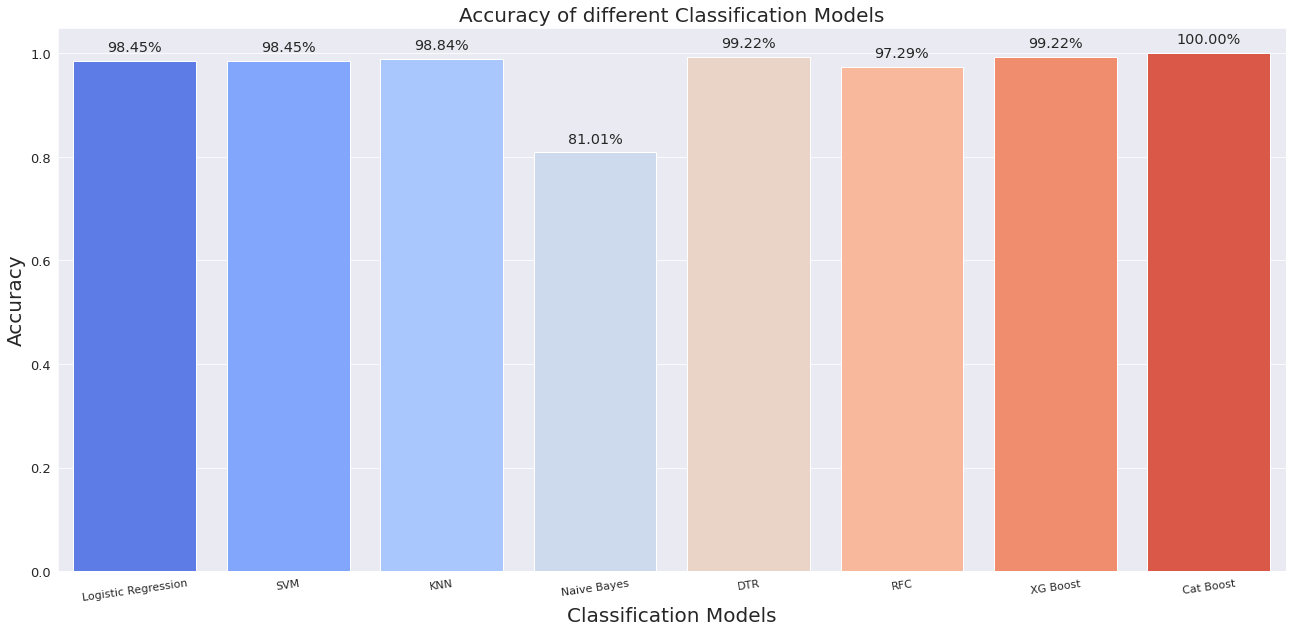

In [60]:
mylist=[]
mylist2=[]
mylist.append(acc1)
mylist2.append("Logistic Regression")
mylist.append(acc2)
mylist2.append("SVM")
mylist.append(acc3)
mylist2.append("KNN")
mylist.append(acc4)
mylist2.append("Naive Bayes")
mylist.append(acc5)
mylist2.append("DTR")
mylist.append(acc6)
mylist2.append("RFC")
mylist.append(acc7)
mylist2.append("XG Boost")
mylist.append(acc8)
mylist2.append("Cat Boost")
plt.rcParams['figure.figsize']=22,10
sns.set_style("darkgrid")
ax = sns.barplot(x=mylist2, y=mylist, palette = "coolwarm", saturation =1.5)
plt.xlabel("Classification Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Classification Models", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()